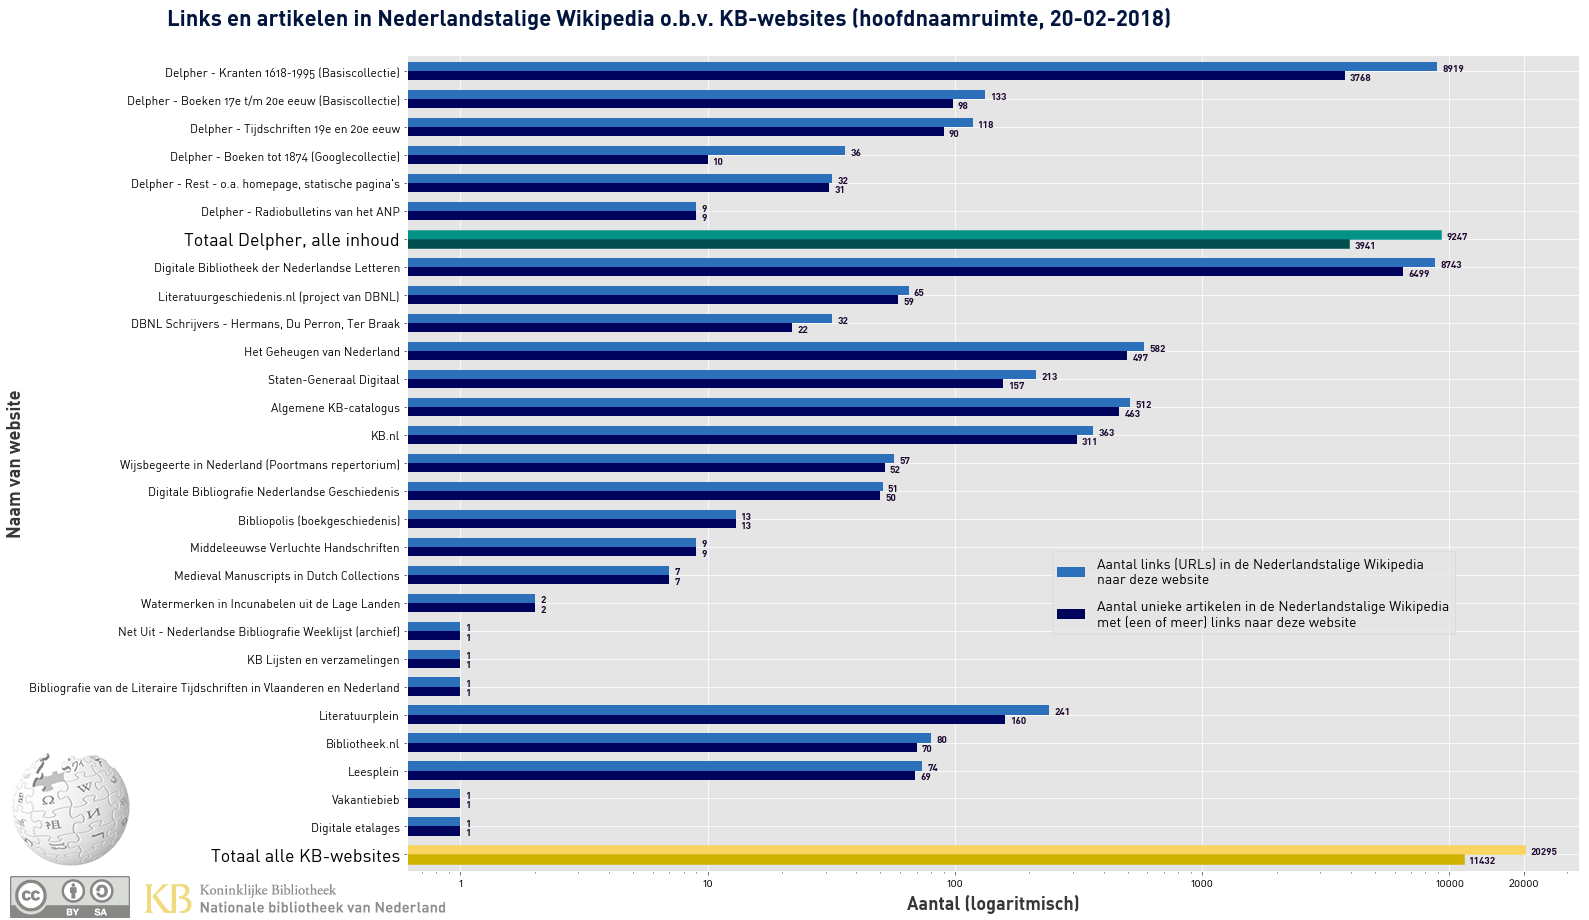

In [9]:
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

myboldfont = {'fontname':'DIN-Bold'}
myregularfont = {'family' : 'DIN-RegularAlternate'}
plt.rc('font', **myregularfont)

# set jupyter's max row and columns display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
# set jupyter's max column width to 50
pd.set_option('display.max_colwidth', 50)

#list of colors by name: https://xkcd.com/color/rgb/

file = 'KPI5-KB-Links_Articles_DutchWikipedia-AllNamespaces_20022018_RawData.csv'
#KB-Dienst;
#Links_hnr;
#Artikelen_hnr;
#Links_overige;
#Artikelen_overige
#Sortorder

# Load the dataset
data2 = pd.read_csv(file, sep=';', encoding='utf-8', engine='python', index_col='Sortorder')

#Draw plot
bar_width2 = 0.65

plotdata=data2[['KB-Dienst', 'Links_hnr','Artikelen_hnr']]
ax2= plotdata.plot(x='KB-Dienst',kind='barh', width=bar_width2, figsize=(21,15), color=["xkcd:medium blue","xkcd:dark blue"], 
    fontsize=12, rot=0)

# Set title and main x,y labels
ax2.set_title("Links en artikelen in Nederlandstalige Wikipedia o.b.v. KB-websites (hoofdnaamruimte, 20-02-2018)",
             fontsize=22, color="xkcd:navy", fontweight='bold', loc='left', **myboldfont).set_position([-0.205,1.03])
ax2.set_xlabel("Aantal (logaritmisch)", fontsize=18, color="xkcd:dark grey", **myboldfont)
ax2.set_ylabel("Naam van website", fontsize=18, color="xkcd:dark grey", **myboldfont)

#Make x axis log scaled
ax2.set_xscale('log')

ax2.invert_yaxis()

ax2.get_xaxis().set_major_formatter(ScalarFormatter())

#set x ticks
xticklist=[1,10,100,1000,10000,20000]
ax2.set_xticks(xticklist)

#Make x and y tick labels black
for i in list(range(0,len(xticklist))): 
    ax2.get_xticklabels()[i].set_color('xkcd:black') 
for j in list(range(0,len(data2))):    
    ax2.get_yticklabels()[j].set_color('xkcd:black')

# Make bigger tick labels for 'Totaal Delper, alle inhoud' and 'Totaal alle KB-diensten'
ax2.get_yticklabels()[6].set_fontsize(18)
ax2.get_yticklabels()[28].set_fontsize(18)

#Add custom colored bars for totals KB and Delpher
#Totaal alle KB-diensten
ax2.get_children()[28].set_color("xkcd:light mustard")
ax2.get_children()[57].set_color("xkcd:mustard")
#Totaal Delpher, alle inhoud
ax2.get_children()[6].set_color("xkcd:teal")
ax2.get_children()[35].set_color("xkcd:dark teal")

##Add numbers at ends of bars
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(1.05*i.get_width(),i.get_y()+0.32, i.get_width(), fontsize=10, color='#1e0a33', **myboldfont)

# Add legend
ax2.legend(('Aantal links (URLs) in de Nederlandstalige Wikipedia\nnaar deze website','Aantal unieke artikelen in de Nederlandstalige Wikipedia\nmet (een of meer) links naar deze website')
           ,bbox_to_anchor=(0.9, 0.4), labelspacing=1.0, frameon=True, fontsize=14)    
    
#Add logos
logo_kb = plt.imread('KBlogoNL_300px.png')
logo_wp= plt.imread('logo_wp_120px.png')
logo_bysa=plt.imread('by-sa_120px.png')
ax2.figure.figimage(logo_wp, 11, 48, alpha=.5, zorder=1,resize=False)
ax2.figure.figimage(logo_kb, 145,7, alpha=.5, zorder=1,resize=False)
ax2.figure.figimage(logo_bysa, 10, 2, alpha=.5, zorder=1,resize=False)
